In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mice = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

print(mice.columns)
print(trial.columns)


# Combine the data into a single dataset
results = pd.merge(mice,trial,
                            on='Mouse ID',
                            how='outer',
                            left_on=None,
                            right_on=None,
                            left_index=False,
                            right_index=False,
                            sort=True,
                            suffixes=('_mouse', '_trials'),
                            copy=True,
                            indicator=False,
                            validate='m:m',
                           )

results.shape
results.loc[(results['Drug']=='Infubinol')&(results['Timepoint']==0)]
results.head()



Index(['Mouse ID', 'Drug'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,0,45.000000,0
1,a203,Infubinol,5,48.508468,0
2,a203,Infubinol,10,51.852437,1
3,a203,Infubinol,15,52.777870,1
4,a203,Infubinol,20,55.173336,1


In [2]:
results.groupby(['Drug','Timepoint'],as_index=False)['Tumor Volume (mm3)'].mean().pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [3]:
tumor_vol = results.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
avg_tumor = tumor_vol.mean()
ste_tumor = tumor_vol.sem()


In [4]:
avg_tumor_df = pd.DataFrame(avg_tumor).unstack().transpose()
ste_tumor_df = pd.DataFrame(ste_tumor).unstack().transpose()

In [5]:
tumor_volume = pd.DataFrame(avg_tumor).reset_index().pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
tumor_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
pd.DataFrame(ste_tumor).reset_index().pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_vol = results.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
mean_tumor_vol.head()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor_vol.reset_index())

# Preview DataFram
mean_tumor_df.head()




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = results.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
sem_tumor_vol.head()

# Convert to DataFrame
sem_tumor_df = pd.DataFrame(sem_tumor_vol.reset_index())

# Preview DataFram
sem_tumor_df.head()




,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_pivot = pd.DataFrame(avg_tumor).reset_index().pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
ste_tumor_pivot = pd.DataFrame(ste_tumor).reset_index().pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
avg_tumor_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
avg_tumor_pivot.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [11]:
test_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [12]:
ste_tumor_pivot[test_drugs]

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [13]:
# set the drug data
capo_mean = avg_tumor_pivot['Capomulin']
capo_ste = ste_tumor_pivot['Capomulin']

inf_mean = avg_tumor_pivot['Infubinol']
inf_ste = ste_tumor_pivot['Infubinol']

keta_mean = avg_tumor_pivot['Ketapril']
keta_ste = ste_tumor_pivot['Ketapril']

plac_mean = avg_tumor_pivot['Placebo']
plac_ste = ste_tumor_pivot['Placebo']

In [14]:
days = results['Timepoint'].unique()

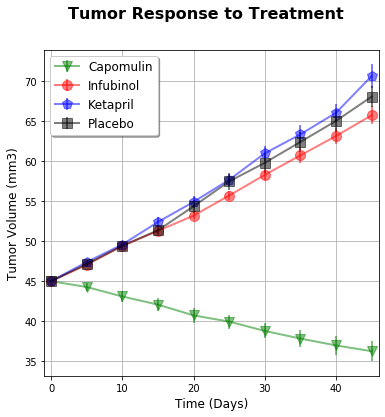

In [15]:
##### Generate the Plot (with Error Bars)

fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("Tumor Response to Treatment", fontsize=16, fontweight="bold")

ax.errorbar(days, capo_mean, capo_ste,
            label = 'Capomulin',
            lw = 2,
            c = 'g',
            marker="v",
            markersize = 10,
            mew = 1,
            alpha=0.5,
              )        

ax.errorbar(days, inf_mean, inf_ste,
            
            label = 'Infubinol',
            lw = 2,
            c = 'r',
            
            marker="o",
            markersize = 10,
            alpha=0.5, 
            
                )

ax.errorbar(days, keta_mean, keta_ste,
            
            label = 'Ketapril',
            lw = 2,
            c = 'b',
            
            marker="p",
            markersize = 10,
            alpha=0.5, 
            
                )

ax.errorbar(days, plac_mean, plac_ste,
            
            label = 'Placebo',
            lw = 2,
            c = 'black',
            
            marker="s",
            markersize = 10,
            alpha=.5, 
            
                )

ax.set_xlim(-1,max(days)+1)
#ax.set_ylim(-1,max(days)+1)

ax.set_xlabel("Time (Days)",fontsize=12)
ax.set_ylabel("Tumor Volume (mm3)",fontsize=12)

ax.grid()


ax.legend(loc='upper left', fontsize=12, fancybox=True, ncol=1, shadow=True)



# Save the Figure

#plt.tight_layout()
plt.savefig("Images/1) Tumor Responses.png")
plt.show()




In [16]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [17]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = results.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean.reset_index())

# Preview DataFrame
meta_mean_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [18]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_ste = results.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
meta_ste_df = pd.DataFrame(meta_ste.reset_index())

# Preview DataFrame
meta_ste_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [19]:
# Minor Data Munging to Re-Format the Data Frames
avg_meta_pivot = pd.DataFrame(meta_mean_df).reset_index().pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
ste_meta_pivot = pd.DataFrame(meta_ste_df).reset_index().pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')


# Preview that Reformatting worked
avg_meta_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [20]:
ste_meta_pivot[test_drugs]

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [21]:
# set the drug data
capo_mean_meta = avg_meta_pivot['Capomulin']
capo_ste_meta = ste_meta_pivot['Capomulin']

inf_mean_meta = avg_meta_pivot['Infubinol']
inf_ste_meta = ste_meta_pivot['Infubinol']

keta_mean_meta = avg_meta_pivot['Ketapril']
keta_ste_meta = ste_meta_pivot['Ketapril']

plac_mean_meta = avg_meta_pivot['Placebo']
plac_ste_meta = ste_meta_pivot['Placebo']

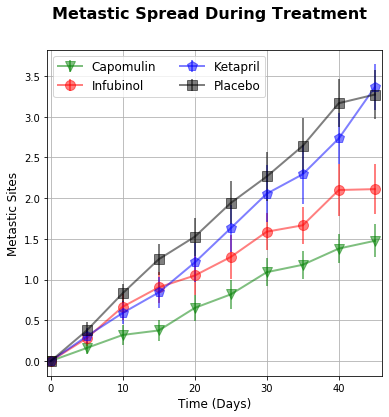

In [22]:
# Generate the Plot (with Error Bars)
fig, chart = plt.subplots(figsize=(6,6))
fig.suptitle("Metastic Spread During Treatment", fontsize=16, fontweight="bold")

chart.errorbar(days, capo_mean_meta, capo_ste_meta,
            label = 'Capomulin',
            lw = 2,
            c = 'g',
            marker="v",
            markersize=10,
            alpha=0.5,
              )        

chart.errorbar(days, inf_mean_meta, inf_ste_meta,
            
            label = 'Infubinol',
            lw = 2,
            c = 'r',
            
            marker="o",
               markersize=10,
            alpha=0.5, 
            
                )

chart.errorbar(days, keta_mean_meta, keta_ste_meta,
            
            label = 'Ketapril',
            lw = 2,
            c = 'b',
            
            marker="p",
               markersize=10,
            alpha=0.5, 
            
                )

chart.errorbar(days, plac_mean_meta, plac_ste_meta,
            
            label = 'Placebo',
            lw = 2,
            c = 'black',
            
            marker="s",
               markersize=10,
            alpha=0.5, 
            
                )

chart.set_xlim(-0.5,max(days)+1)

chart.set_xlabel("Time (Days)",fontsize=12)
chart.set_ylabel("Metastic Sites", fontsize=12)

chart.grid()


chart.legend(loc="upper left", fontsize=12, fancybox=True,ncol=2)

# Save the Figure
plt.savefig("Images/2) Metastic Spread.png")


# Show the Figure
plt.show()


In [23]:
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle("Metastic Spread During Treatment", fontsize=16, fontweight="bold")

ax.errorbar(days, capo_mean_meta, capo_ste_meta,
            label = 'Capomulin',
            lw = 2,
            c = 'g',
            marker="v",
            markersize = 10,
            mew = 1,
            alpha=0.5,
              )        

ax.errorbar(days, inf_mean_meta, inf_ste_meta,
            
            label = 'Infubinol',
            lw = 2,
            c = 'r',
            
            marker="o",
            markersize = 10,
            alpha=0.5, 
            
                )

ax.errorbar(days, keta_mean_meta, keta_ste_meta,
            
            label = 'Ketapril',
            lw = 2,
            c = 'b',
            
            marker="p",
            markersize = 10,
            alpha=0.5, 
            
                )

ax.errorbar(days, plac_mean_meta, plac_ste_meta,
            
            label = 'Placebo',
            lw = 2,
            c = 'black',
            
            marker="s",
            markersize = 10,
            alpha=1, 
            
                )

ax.set_xlim(-0.5,max(days))
ax.set_xlabel("Time (Days)",fontsize=12)
ax.set_ylabel("Metastic Sites",)
ax.grid()
ax.legend(loc="upper left", fontsize="small", fancybox=True, ncol=2)

# create a text for observiations

bbox_props = dict(boxstyle="square,pad=1", fc="white", ec="grey", lw=2)

plt.text(47, , 
f'''Research clearly shows 
that {drug_names[0]} was 
the most effective drug 
by reducing tumor 
size by {round(change_values[0])}%.

{drug_names[0]} is my
drug of choice when I 
need to reduce tumors.
~ Glenn H.''', 
         size=12, rotation=0,
         ha="left", va="top",
         bbox=bbox_props
         )
    

# Save the Figure
plt.savefig("Images/Metastic Spread.png")


# Show the Figure
plt.show()



SyntaxError: invalid syntax (<ipython-input-23-91ca41df0188>, line 60)

In [ ]:
mean_tumor_vol[test_drugs].head()

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = results.groupby(['Drug','Timepoint'])['Metastatic Sites'].count()

# Convert to DataFrame
mice = pd.DataFrame(mouse_count).reset_index()

# Preview DataFrame
mice.head()


In [ ]:
for

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

mice_pivot = mice.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview the Data Frame
mice_pivot[test_drugs]


In [ ]:
capo_count = mice_pivot['Capomulin']*4
inf_count = mice_pivot['Infubinol']*4
keta_count = mice_pivot['Ketapril']*4
plac_count = mice_pivot['Placebo']*4

In [ ]:
fig, chart = plt.subplots(figsize=(6,6))
fig.suptitle("Survival Rates", fontsize=16, fontweight="bold")

chart.plot(days, capo_count,
            label = 'Capomulin',
            lw = 2,
            c = 'g',
            marker="v",
            mew = 1,
            alpha=0.5,
              )        

chart.plot(days, inf_count,
            
            label = 'Infubinol',
            lw = 2,
            c = 'r',
            
            marker="o",
            alpha=0.5, 
            
                )

chart.plot(days, keta_count,
            
            label = 'Ketapril',
            lw = 2,
            c = 'b',
            
            marker="p",
            alpha=0.5, 
            
                )

chart.plot(days, plac_count,
            
            label = 'Placebo',
            lw = 2,
            c = 'black',
            
            marker="s",
            alpha=0.5, 
            
                )

chart.set_xlim(-0.5,max(days)+1)

chart.set_xlabel("Time (Days)",fontsize=12)
chart.set_ylabel("Survival Rates %",fontsize=12)

chart.grid()


chart.legend(loc="lower left", fontsize=12, fancybox=True)

# Save the Figure
plt.savefig("Images/3) Survival Rates.png")


# Show the Figure
plt.show()


## Summary Bar Graph

In [ ]:
t1 = tumor_volume[test_drugs].transpose().reset_index()[[0,45]]
t1['Change'] = t1[45]/t1[0]-1
t1


In [ ]:
type(t1)

In [ ]:
# Calculate the percent changes for each drug
t1 = tumor_volume[test_drugs].transpose().reset_index()[['Drug',0,45]]
t1['Change'] = (t1[45]/t1[0]-1)*100

# Display the data to confirm
t1


In [ ]:
t1['Mask'] = t1['Change'] < 0
t1

In [ ]:
change_values = t1['Change'].tolist()
drug_names = t1['Drug'].tolist()

In [ ]:
# Set x axis and tick locations
x_axis = np.arange(len(t1['Change']))
tick_locations = [v+1 for v in x_axis]

In [ ]:

plt.figure(figsize=(10,6))
plt.xticks(tick_locations, t1['Drug'])

plt.bar(x_axis, t1['Change'], 
        color = t1.Mask.map({True:'g',False:'r'}), 
        alpha=1, 
        align="edge",
        width=1)
            

plt.xticks(tick_locations, t1['Drug'],fontsize=14,ha='right')

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(min(t1['Change']*1.1), max(t1['Change']*1.2))

# Set a Title and labels
plt.title("Change in Tumor Size over 45 Day Treatment", fontsize=16, fontweight="bold")
plt.xlabel("Treatment Drug", fontsize=12)
plt.ylabel("Change in Tumor Volume (%)",fontsize=12)
           
# adding some labels to the chart

# get the values:
change_values = t1['Change'].tolist()
drug_names = t1['Drug'].tolist()

# loop through the data to create & position the labels and look for the best.

for x in range(len(x_axis)):
    if change_values[x] < 0:
        plt.text(x+.3,-9,f'{round(change_values[x],0)}%',fontsize='15',c='white',weight='bold')
        plt.text(x+.3,-14,f'{drug_names[x]}',fontsize='12',c='white',variant='small-caps')
    else:
        plt.text(x+.3,11,f'{round(change_values[x],0)}%',fontsize='15',c='white',weight='bold')
        plt.text(x+.3,5,f'{drug_names[x]}',fontsize='14',c='white',variant='small-caps')
        
# create a text for observiations

bbox_props = dict(boxstyle="square,pad=1", fc="white", ec='grey', lw=2, alpha=1)

plt.text(-.1, 57, f'''Our research clearly 
shows that {drug_names[0]} 
was the most effective 
drug in our test group
by reducing tumor 
size by {round(change_values[0])}%.
''', 
         size=12, rotation=0,
         ha="left", va="top",
         bbox=bbox_props
         )
    
    

    
plt.tight_layout()
plt.grid()
plt.savefig("Images/4) Tumor Change.png")
plt.show()





# Woodall Observations of Drug Data

1) Of the 4 drugs in our test group, only Capomulin showed signs of efficacy against squamous cell carcinoma (SCC) by significantly reducing tumor volume over the course of treatment.  

2) Capomulin was also effective in reducing the number of metastic sites by 50% compared to the plaebo.  

3) While Infubinol showed no effect on reducing tumor volume in its test subjects, it was effective in reducing the overall metastic sites. Still, there are greater risks in taking Infubinol as it showed the lowest survival rate among all test subjects.  